In [34]:
from torchvision.models import ResNet18_Weights
%matplotlib inline
import torch
import torchvision
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

In [35]:
pretrain_net = torchvision.models.resnet18(pretrained = True)
list(pretrain_net.children())[-3:]

[Sequential(
   (0): BasicBlock(
     (conv1): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
     (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (relu): ReLU(inplace=True)
     (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (downsample): Sequential(
       (0): Conv2d(256, 512, kernel_size=(1, 1), stride=(2, 2), bias=False)
       (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     )
   )
   (1): BasicBlock(
     (conv1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (relu): ReLU(inplace=True)
     (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn2): Batc

In [36]:
net = nn.Sequential(*list(pretrain_net.children())[:-2])
net

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [37]:
X = torch.rand(size=(1,3,320,480))
net(X).shape

torch.Size([1, 512, 10, 15])

In [38]:
num_classes = 2
net.add_module('final_conv', nn.Conv2d(512, num_classes, kernel_size=1))
net.add_module('transpose_conv', nn.ConvTranspose2d(num_classes, num_classes,
                                    kernel_size=64, padding=16, stride=32))

In [39]:
def bilinear_kernel(in_channels, out_channels, kernel_size):
    factor = (kernel_size + 1) // 2
    if kernel_size % 2 == 1:
        center = factor - 1
    else:
        center = factor - 0.5
    og = (torch.arange(kernel_size).reshape(-1, 1),
          torch.arange(kernel_size).reshape(1, -1))
    filt = (1 - torch.abs(og[0] - center) / factor) * \
           (1 - torch.abs(og[1] - center) / factor)
    weight = torch.zeros((in_channels, out_channels,
                          kernel_size, kernel_size))
    weight[range(in_channels), range(out_channels), :, :] = filt
    return weight

In [40]:
conv_trans = nn.ConvTranspose2d(3, 3, kernel_size=4, padding=1, stride=2,
                                bias=False)
conv_trans.weight.data.copy_(bilinear_kernel(3, 3, 4));

In [29]:
# img = torchvision.transforms.ToTensor()(d2l.Image.open("0001-2.jpg"))
# X = img.unsqueeze(0)
# Y = conv_trans(X)
# out_img = Y[0].permute(1,2,0).detach()
# out_img.shape

In [41]:
W = bilinear_kernel(num_classes, num_classes, 64)
net.transpose_conv.weight.data.copy_(W);

In [45]:
from read_data import Mydata
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

transform = transforms.Compose([transforms.Resize((256, 256)), transforms.ToTensor()])
batch_size, crop_size = 32, (320, 480)

train_data = Mydata("data/ImageSets/Segmentation","data/JPEGImages","data/SegmentationClass",transform,"train")
test_data = Mydata("data/ImageSets/Segmentation", "data/JPEGImages", "data/SegmentationClass", transform, "test")

train_dataloader = DataLoader(train_data, batch_size=4)
test_dataloader = DataLoader(test_data, batch_size=4)

In [46]:
for img in train_dataloader:
    pass

0105-3
0014-3
0120-1
0070-1
0096-4
0064-2
0068-1
0069-3
0117-2
0087-1
0059-3
0072-2
0014-1
0039-4
0030-1
0041-2
0116-2
0073-4
0117-4
0071-4
0064-4
0116-3
0017-1
0055-2
0061-1
0001-3
0054-2
0082-2
0043-1
0085-4
0111-2
0081-4
0021-1
0062-2
0007-1
0076-2
0031-3
0027-4
0083-1
0101-4
0118-4
0089-3
0069-2
0033-1
0088-4
0046-2
0109-4
0116-1
0042-4
0006-1
0029-3
0042-3
0075-3
0105-4
0055-1
0002-2
0037-4
0071-2
0023-4
0026-2
0060-1
0062-1
0085-3
0067-2
0115-4
0015-2
0120-2
0004-3
0041-4
0084-3
0002-1
0068-4
0050-1
0009-3
0011-3
0030-3
0114-2
0081-2
0007-2
0103-4
0104-3
0108-2
0032-1
0019-4
0001-4
0004-1
0040-4
0093-1
0034-1
0003-4
0083-2
0022-4
0016-1
0005-1
0060-2
0019-3
0091-2
0116-4
0100-2
0048-4
0091-1
0024-1
0081-3
0098-2
0052-2
0071-1
0090-3
0079-2
0090-4
0016-3
0044-4
0054-4
0084-1
0094-2
0076-3
0057-3
0043-3
0078-3
0109-2
0038-2
0093-3
0036-4
0087-3
0062-4
0014-2
0068-3
0044-2
0001-2
0037-1
0113-1
0037-3
0121-2
0106-1
0065-2
0026-4
0019-2
0019-1
0033-4
0122-1
0055-3
0079-1
0009-1
0070-4

0105-3
0014-3
0120-1
0070-1
torch.Size([4, 2, 256, 256])
torch.Size([4, 1, 256, 256])


RuntimeError: only batches of spatial targets supported (3D tensors) but got targets of dimension: 4

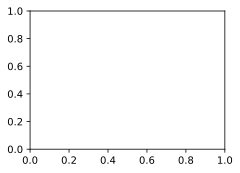

In [47]:
def loss(inputs, targets):
    print(inputs.shape)
    print(targets.shape)
    return F.cross_entropy(inputs, targets, reduction='none').mean(1).mean(1)

num_epochs, lr, wd, devices = 5, 0.001, 1e-3, d2l.try_all_gpus()
trainer = torch.optim.SGD(net.parameters(), lr=lr, weight_decay=wd)
d2l.train_ch13(net, train_dataloader, test_dataloader, loss, trainer, num_epochs, devices)